In [ ]:
from neuron import h, gui
from ballandstick import BallAndStick,BallAndStick_pas
from neuron.units import ms,mV,um,V,m
import matplotlib.pyplot as plt
import numpy as np
h.load_file("stdrun.hoc")
h.cvode_active(0) #turn off variable time step
print(h.units('x3d'))

In [2]:
##### model cell #call interpxyz - why?
cell=BallAndStick_pas(0,0,0,0,0,11)
print(cell.soma.nseg,cell.dend.nseg)
h.load_file("interpxyz.hoc")
h.load_file("setpointers.hoc")
#h.celsius=37

1 19
After any change to cell geometry or nseg, be sure to invoke setpointers()


1.0

In [3]:
#verify xtra and extracellular are inserted in every section
for sec in cell.all:
    if h.ismembrane("xtra") and h.ismembrane("extracellular") :
        print(1)

1
1


In [ ]:
### Set rx
from calcrx import setelec,homogenous,set_uniform_field_between_plates
#setelec([50],[0],[0])
#remember V=R*I
#for 100 mV, we can do it like this 
#rx=0.001 MOhm
#is=0.1 mA
#rho=100000 #ohm cm
#factor=10
#homogenous(rho,factor)

v_plate=40*V #- potential difference between the plates
distance=1*m #distance
field_orientation=np.array([1,0,0])#along the x axis
ref_point=[0,0,0] #reference point with a 0 e_extracellular

set_uniform_field_between_plates(v_plate,distance,field_orientation,ref_point)

In [5]:
from savedata import saveparams
saveparams(0,cell)

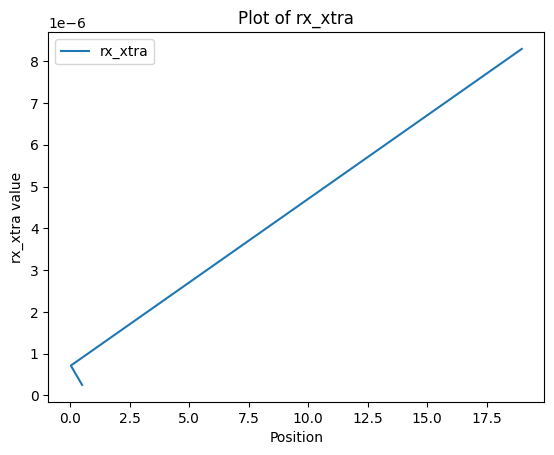

In [6]:
#using matplotlib
fig, ax = plt.subplots()
# This manually retrieves and plots the data from the RangeVarPlot
x_vals = []
y_vals = []
# Loop over segments in the range and extract rx_xtra values
for sec in h.allsec():
    if h.ismembrane("xtra"):  # Ensure the mechanism exists
        for i,seg in enumerate(sec):
            x_vals.append(seg.x+i)  # Get the distance or position #should have y dependency and z as well if possible #it's scuffed
            y_vals.append(seg.rx_xtra)  # Access the range variable 'rx_xtra'

ax.plot(x_vals, y_vals, label='rx_xtra')
ax.set_xlabel("Position")
ax.set_ylabel("rx_xtra value")
ax.set_title("Plot of rx_xtra")
plt.legend()
plt.show()

In [7]:
dt=0.1*ms
simtime=300*ms

In [ ]:
#Set the waveform and amplitude for the stimulus (is)

#Set the waveform and amplitude for the stimulus (is)
import stim

#vector play method
#delay, duration, amplitude
#stim.stimplay(1, 100, 1.57263*2)
#tvec,gvec=stim.stimplay(1,100,-30,simtime)

#squarewave
#cell(just to insert the faux point process)
#cell,delay,freq,number of cycles, amp1, amp2
# fsquare=stim.squarestim(cell,1,100,200,1,-1)

#sinwave
#cell,delay, number of full cycles, frequency, amp
#sinstim(cell,ton,nc,f0,amp)
#fzap=stim.sinstim(cell,1,500,100,1)


#playsin
# ton,amp,dt,dur,simtime,freq
ton=50
amp=10
dur=150
freq=50
times,stim1=stim.playsin(ton,amp,dt,dur,simtime,freq)



#simpleplaysin
#amp,dt,tstop,freq

# amp=100
# tstop=simtime
# freq=100
# times,stim1=stim.simpleplaysin(amp,dt,tstop,freq)

print(1)

1


In [9]:
#Record things
t=h.Vector().record(h._ref_t)
is_xtra=h.Vector().record(h._ref_is_xtra)
soma_v=h.Vector().record(cell.soma(0.5)._ref_v)
dend_v=h.Vector().record(cell.dend(0.5)._ref_v)
extracellular_e = h.Vector().record(cell.soma(0.5)._ref_e_extracellular)
extracellular_v_soma = h.Vector().record(cell.soma(0.5)._ref_vext[0])

In [10]:

# h.load_file("./ses_files/runcontrol.ses")
# h.load_file("./ses_files/graphs.ses")
# h.dt=dt
# h.finitialize(-70*mV)
# h.tstop=simtime


In [11]:
#import init_run and field calculation
'''
h.dt=dt
from field_calc import init,advance,vrec
init(-70*mV)
times=int(simtime/dt)
print(times)

for i in range(times):
    advance()
'''

'\nh.dt=dt\nfrom field_calc import init,advance,vrec\ninit(-70*mV)\ntimes=int(simtime/dt)\nprint(times)\n\nfor i in range(times):\n    advance()\n'

In [12]:
h.dt=dt
h.finitialize(-70*mV)
h.continuerun(simtime)


0.0

In [13]:
#save the data obtained in the run
from savedata import savedata
vrec=range(len(t))
savedata(0,t,soma_v,dend_v,extracellular_v_soma,is_xtra,vrec)

1.0

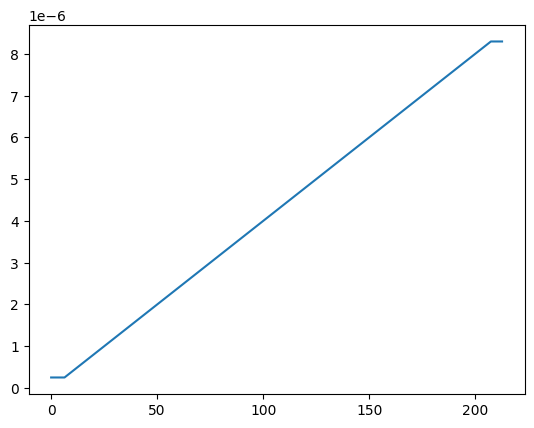

In [14]:
### Plot rx #based on exercise 1 - neuron course 2021
plot_rx=h.RangeVarPlot('rx_xtra',cell.soma(0),cell.dend(1)) #spaceplot
graph = plt.gca()
#label1="t={}".format(t)
label1="rx"
plot_rx.plot(graph,label=label1)
#h.PlotShape("rx_xtra")
#using the GUI

g = h.Graph()
g.size(0, 1002, -70, 50) #xstart,xstop,ystart,ystop #should choose based on the values - in this case - 1e-5 for y?
g.addobject(plot_rx)
g.label(0.8,0.1,"rx_plot")
g.flush()

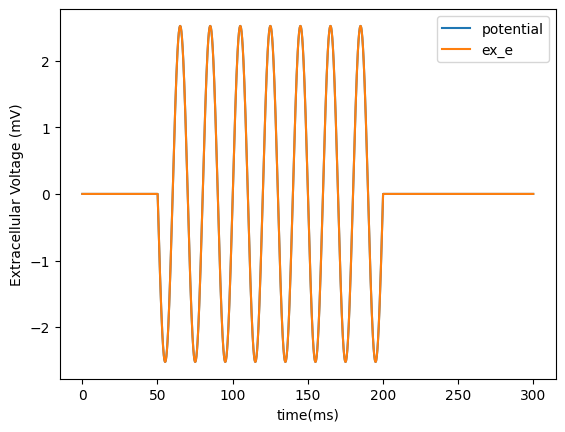

In [15]:
#plot extracellular voltage over time
#potential at the external surface of the soma
plt.Figure()
plt.plot(t,extracellular_v_soma,label="potential")
plt.plot(t,extracellular_e,label="ex_e")
plt.xlabel("time(ms)")
plt.ylabel("Extracellular Voltage (mV)")
plt.legend()
plt.show()
# print(list(t))

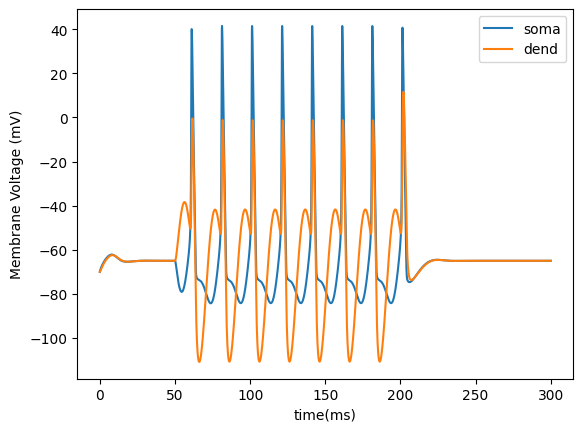

In [16]:
#plot intracellular voltage over time
plt.Figure()
plt.plot(t,soma_v,label="soma")
plt.plot(t,dend_v,label="dend")
plt.xlabel("time(ms)")
plt.ylabel("Membrane Voltage (mV)") #vint-vext~
plt.legend()
plt.show()

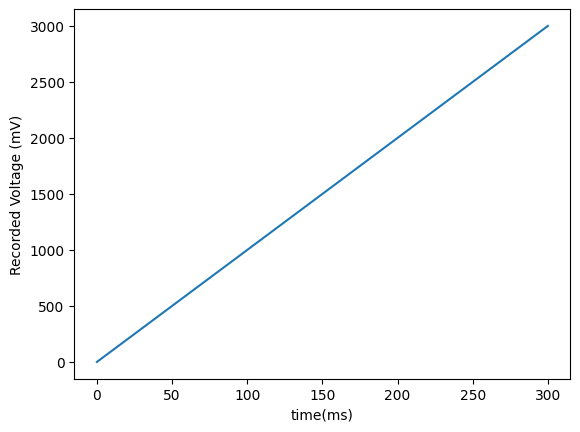

In [17]:
plt.Figure()
plt.plot(t,vrec)
plt.xlabel("time(ms)")
plt.ylabel("Recorded Voltage (mV)")
plt.show()

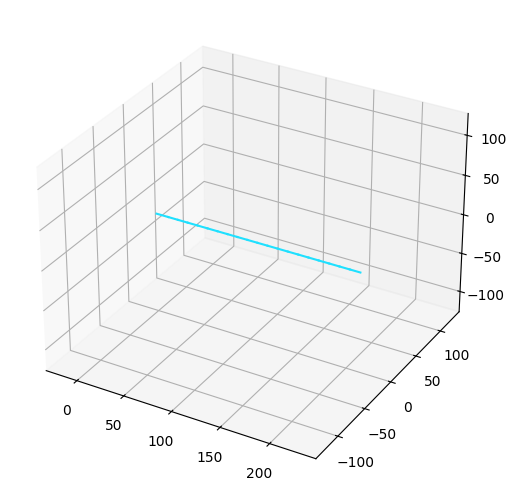

In [18]:
#Shape plot of v.
ps = h.PlotShape(False)
ps.variable("v")
ps.show(1)
ps.plot(plt,color="red")
plt.show()

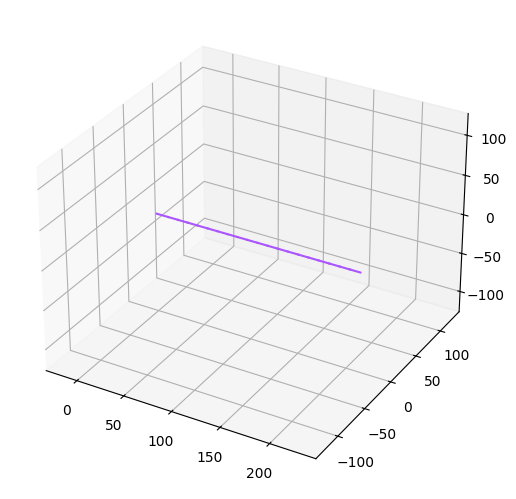

In [19]:
#Shape plot of e_extracellular
ps = h.PlotShape(False)
ps.variable("e_extracellular")
ps.show(1)
ps.plot(plt, color="red")
plt.show()

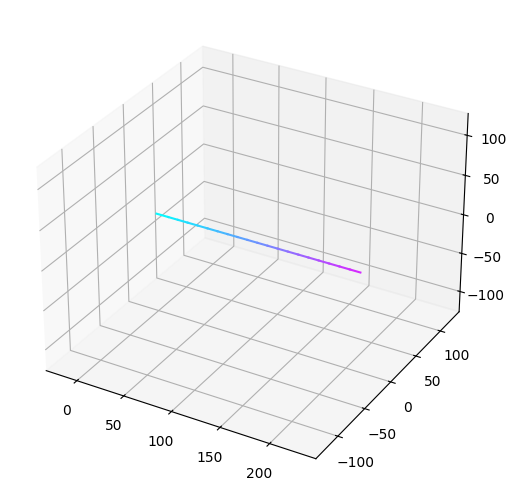

In [20]:
#Shape plot of rx_xtra
ps = h.PlotShape(False)
ps.variable("rx_xtra")
ps.scale(0, 1e-5)
ps.show(1)
ps.plot(plt, color="red")
plt.show()

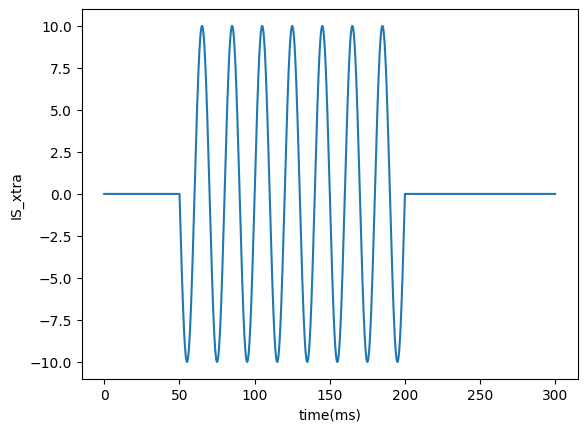

In [21]:
#plot is over time
plt.Figure()
plt.plot(t,is_xtra)
plt.xlabel("time(ms)")
plt.ylabel("IS_xtra")
plt.show()

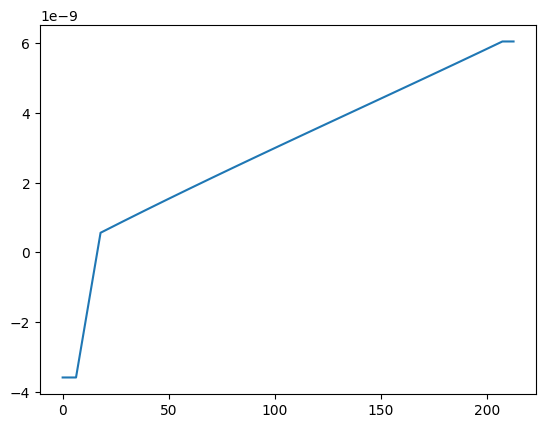

In [22]:
### Plot er #based on exercise 1 - neuron course 2021
plot_rx=h.RangeVarPlot('er_xtra',cell.soma(0),cell.dend(1)) #spaceplot
graph = plt.gca()
#label1="t={}".format(t)
label1="er_xtra"
plot_rx.plot(graph,label=label1)

Times array: [0.000e+00 1.000e-01 2.000e-01 ... 2.998e+02 2.999e+02 3.000e+02]
Length of times array: 3001
Length of NEURON time vector: 3001
Length of NEURON stim vector: 3001
[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004, 3.0, 3.1, 3.2, 3.3000000000000003, 3.4000000000000004, 3.5, 3.6, 3.7, 3.8000000000000003, 3.9000000000000004, 4.0, 4.1000000000000005, 4.2, 4.3, 4.4, 4.5, 4.6000000000000005, 4.7, 4.800000000000001, 4.9, 5.0, 5.1000000000000005, 5.2, 5.300000000000001, 5.4, 5.5, 5.6000000000000005, 5.7, 5.800000000000001, 5.9, 6.0, 6.1000000000000005, 6.2, 6.300000000000001, 6.4, 6.5, 6.6000000000000005, 6.7, 6.800000000000001, 6.9, 7.0, 7.1000000000000005, 7.2, 7.300000000000001, 7.4, 7.5, 7.6000000000000005, 7.7, 7.

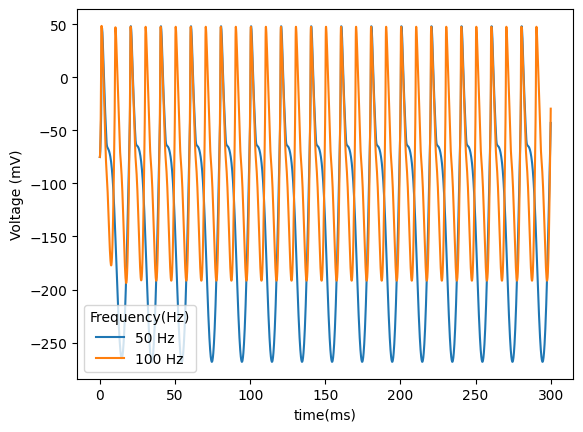

In [23]:
from freqtest import freqtest
fmin=50
fmax=150
step=50
amp=100
v_init=-75*mV
freqtest(fmin,fmax,step,amp,simtime,dt,cell,v_init)